# Online Shoppers Intention Prediction



## Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the data
pd.set_option('display.max_columns', 100)
df=pd.read_csv('online_shoppers_intention.csv', index_col=False)
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Lets look at the data types for each 

In [126]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

The data types for month and Visitor type are object since they are string values. The other categorical features are int64 while the numeric features are float.

### Now we will check to see if there are any NaN or missing values. 

In [127]:
#percent missing values per columns
(df.isna().sum()/df.shape[0])*100

Administrative             0.113544
Administrative_Duration    0.113544
Informational              0.113544
Informational_Duration     0.113544
ProductRelated             0.113544
ProductRelated_Duration    0.113544
BounceRates                0.113544
ExitRates                  0.113544
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

All numeric columns have 0.11 percent (14) of their values missing values. lets have a look at these values

In [128]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


The revenue generated for all the NaN values is Flase and most of them were in the month of march 

In [129]:
df= df.dropna()

In [130]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

lets set the dtype of categorical columns to pandas category so that we can run the respective descriptive statistics 

In [131]:
cat_cols = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numeric_cols = list(set(df.columns)-set(cat_cols+['Month']))
cat_dtype = pd.api.types.CategoricalDtype(categories=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],
                                          ordered=True)#ordered dtype for month

In [132]:
df[cat_cols]= df[cat_cols].astype('category')
df[['Administrative','Informational','ProductRelated']]=df[['Administrative','Informational','ProductRelated']].astype('int')
df['Month']=df['Month'].astype(cat_dtype)
cat_cols+=['Month']

In [133]:
df[cat_cols].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month
count,12316,12316,12316,12316,12316,12316,12316,12316
unique,8,13,9,20,3,2,2,10
top,2,2,1,2,Returning_Visitor,False,False,May
freq,6593,7951,4774,3909,10537,9451,10408,3363


In [134]:
df[numeric_cols].describe()

,PageValues,ExitRates,BounceRates,ProductRelated,Informational,ProductRelated_Duration,SpecialDay,Administrative_Duration,Administrative,Informational_Duration
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,5.895952,0.043003,0.022152,31.763884,0.503979,1196.037057,0.061497,80.906176,2.317798,34.506387
std,18.577926,0.048527,0.048427,44.490339,1.270701,1914.372511,0.199020,176.860432,3.322754,140.825479
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,0.000000,0.014286,0.000000,7.000000,0.000000,185.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.025124,0.003119,18.000000,0.000000,599.766190,0.000000,8.000000,1.000000,0.000000
75%,0.000000,0.050000,0.016684,38.000000,0.000000,1466.479902,0.000000,93.500000,4.000000,0.000000
max,361.763742,0.200000,0.200000,705.000000,24.000000,63973.522230,1.000000,3398.750000,27.000000,2549.375000


Above we can se that the minimum value of duration is -1 which is not possible it is clipped.

In [135]:
df[numeric_cols] = df[numeric_cols].clip(lower=0)

In [136]:
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64


## Univariate analysis

Lets look at the distributions of categorical variables.

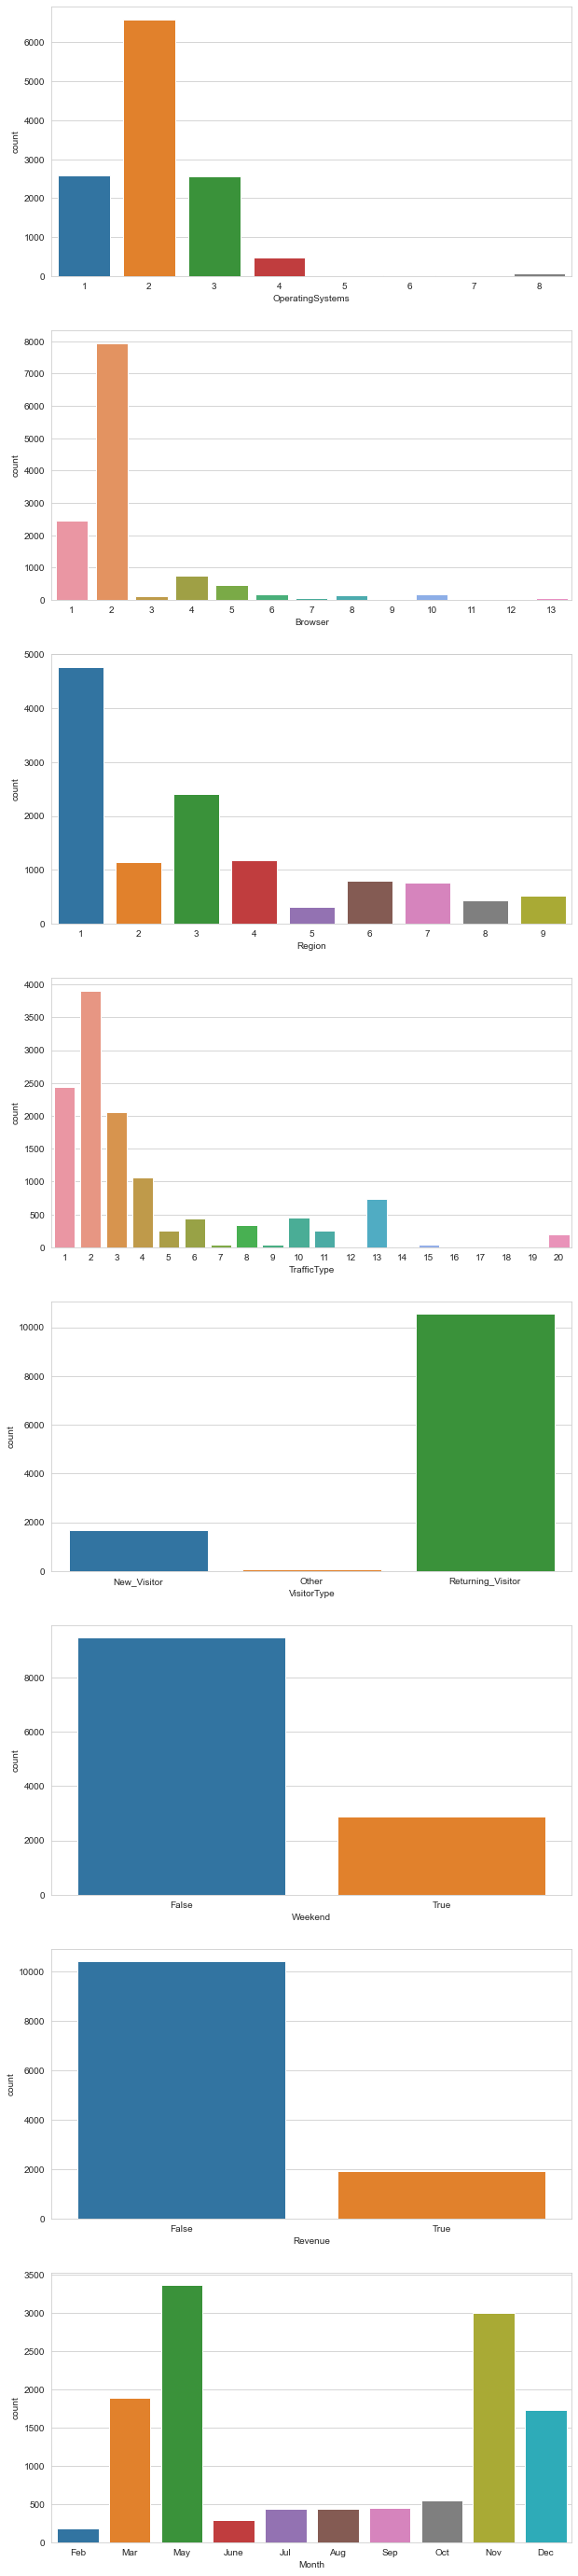

In [137]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
        sns.countplot(x=col,data=df[cat_cols],ax=ax[idx])

From the above plots it is clear that 
1. The target variable Revenue is imbalanced.
2. Data was not collected in the months of jan and april
3. The Data collected is not uniformly dostributed among the months and Region
4. OperatingSystem, Browser, TrafficType apperas to have some categories missing

In [138]:
df['TrafficType'].value_counts()

2     3909
1     2444
3     2051
4     1069
13     737
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

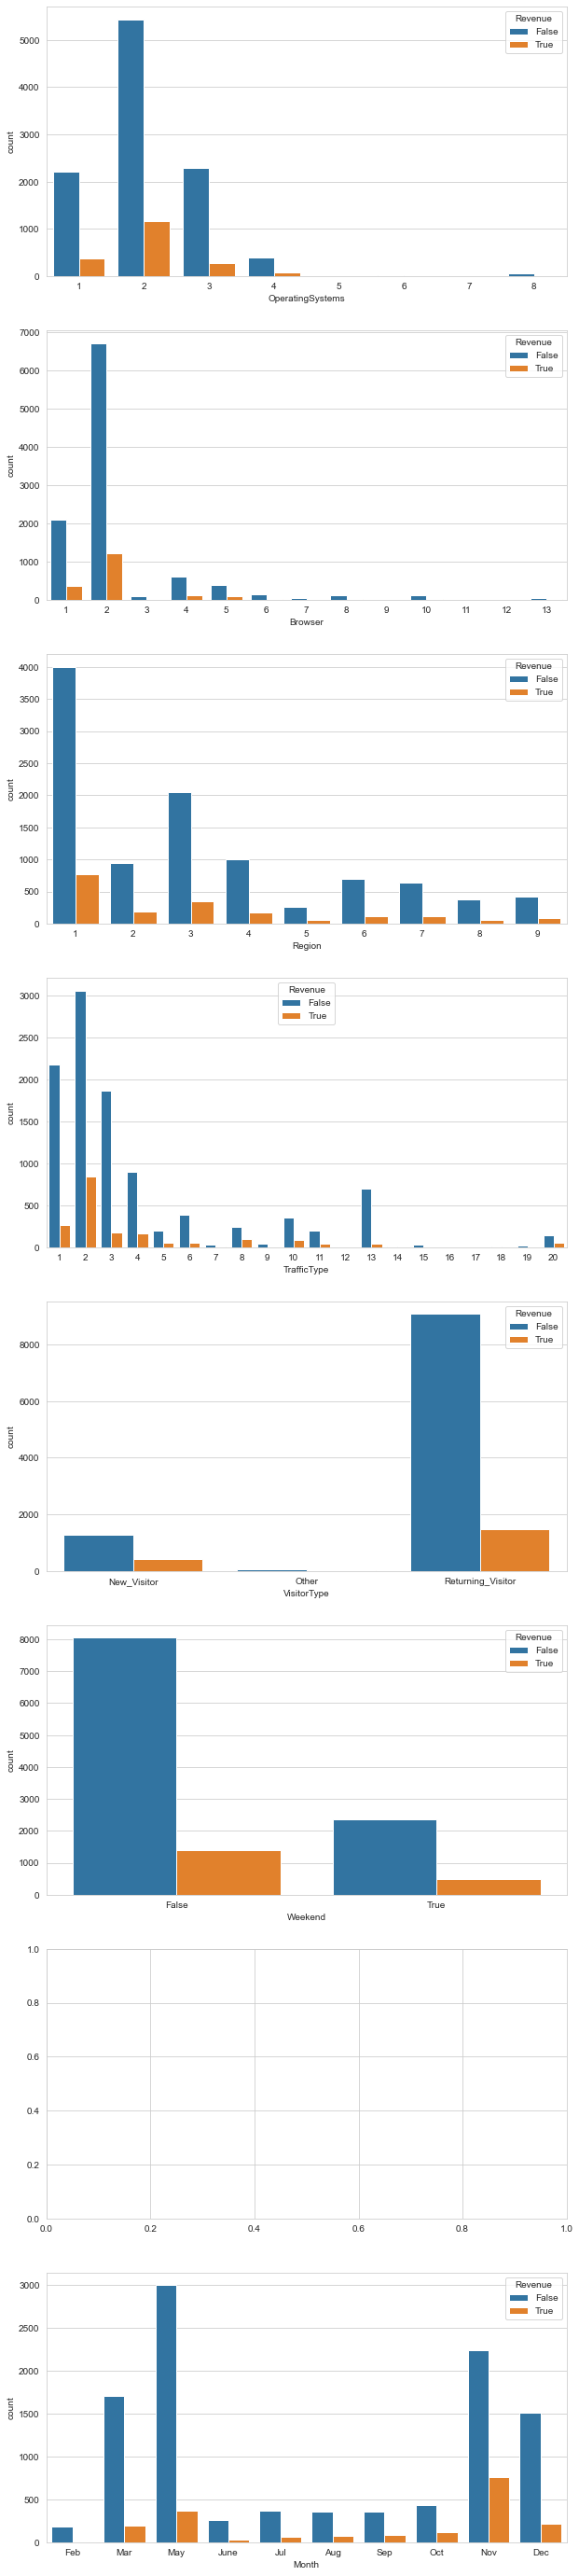

In [139]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(10,50))
for idx,col in enumerate(cat_cols):
    if col!='Revenue':
        sns.countplot(x=col,data=df[cat_cols],hue='Revenue',ax=ax[idx])

Distributions of numerical variables

In [140]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PageValues               12316 non-null  float64
 1   ExitRates                12316 non-null  float64
 2   BounceRates              12316 non-null  float64
 3   ProductRelated           12316 non-null  int32  
 4   Informational            12316 non-null  int32  
 5   ProductRelated_Duration  12316 non-null  float64
 6   SpecialDay               12316 non-null  float64
 7   Administrative_Duration  12316 non-null  float64
 8   Administrative           12316 non-null  int32  
 9   Informational_Duration   12316 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 1.2 MB


In [141]:
for idx,col in enumerate(numeric_cols):
    print(df[col])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
12325    12.241717
12326     0.000000
12327     0.000000
12328     0.000000
12329     0.000000
Name: PageValues, Length: 12316, dtype: float64
0        0.200000
1        0.100000
2        0.200000
3        0.140000
4        0.050000
           ...   
12325    0.029031
12326    0.021333
12327    0.086667
12328    0.021053
12329    0.066667
Name: ExitRates, Length: 12316, dtype: float64
0        0.200000
1        0.000000
2        0.200000
3        0.050000
4        0.020000
           ...   
12325    0.007143
12326    0.000000
12327    0.083333
12328    0.000000
12329    0.000000
Name: BounceRates, Length: 12316, dtype: float64
0         1
1         2
2         1
3         2
4        10
         ..
12325    53
12326     5
12327     6
12328    15
12329     3
Name: ProductRelated, Length: 12316, dtype: int32
0        0
1        0
2        0
3        0
4        0
        ..
123

In [142]:
df[numeric_cols].describe()

,PageValues,ExitRates,BounceRates,ProductRelated,Informational,ProductRelated_Duration,SpecialDay,Administrative_Duration,Administrative,Informational_Duration
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,5.895952,0.043003,0.022152,31.763884,0.503979,1196.039736,0.061497,80.908856,2.317798,34.509067
std,18.577926,0.048527,0.048427,44.490339,1.270701,1914.370836,0.199020,176.859199,3.322754,140.824813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000,7.000000,0.000000,185.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.025124,0.003119,18.000000,0.000000,599.766190,0.000000,8.000000,1.000000,0.000000
75%,0.000000,0.050000,0.016684,38.000000,0.000000,1466.479902,0.000000,93.500000,4.000000,0.000000
max,361.763742,0.200000,0.200000,705.000000,24.000000,63973.522230,1.000000,3398.750000,27.000000,2549.375000


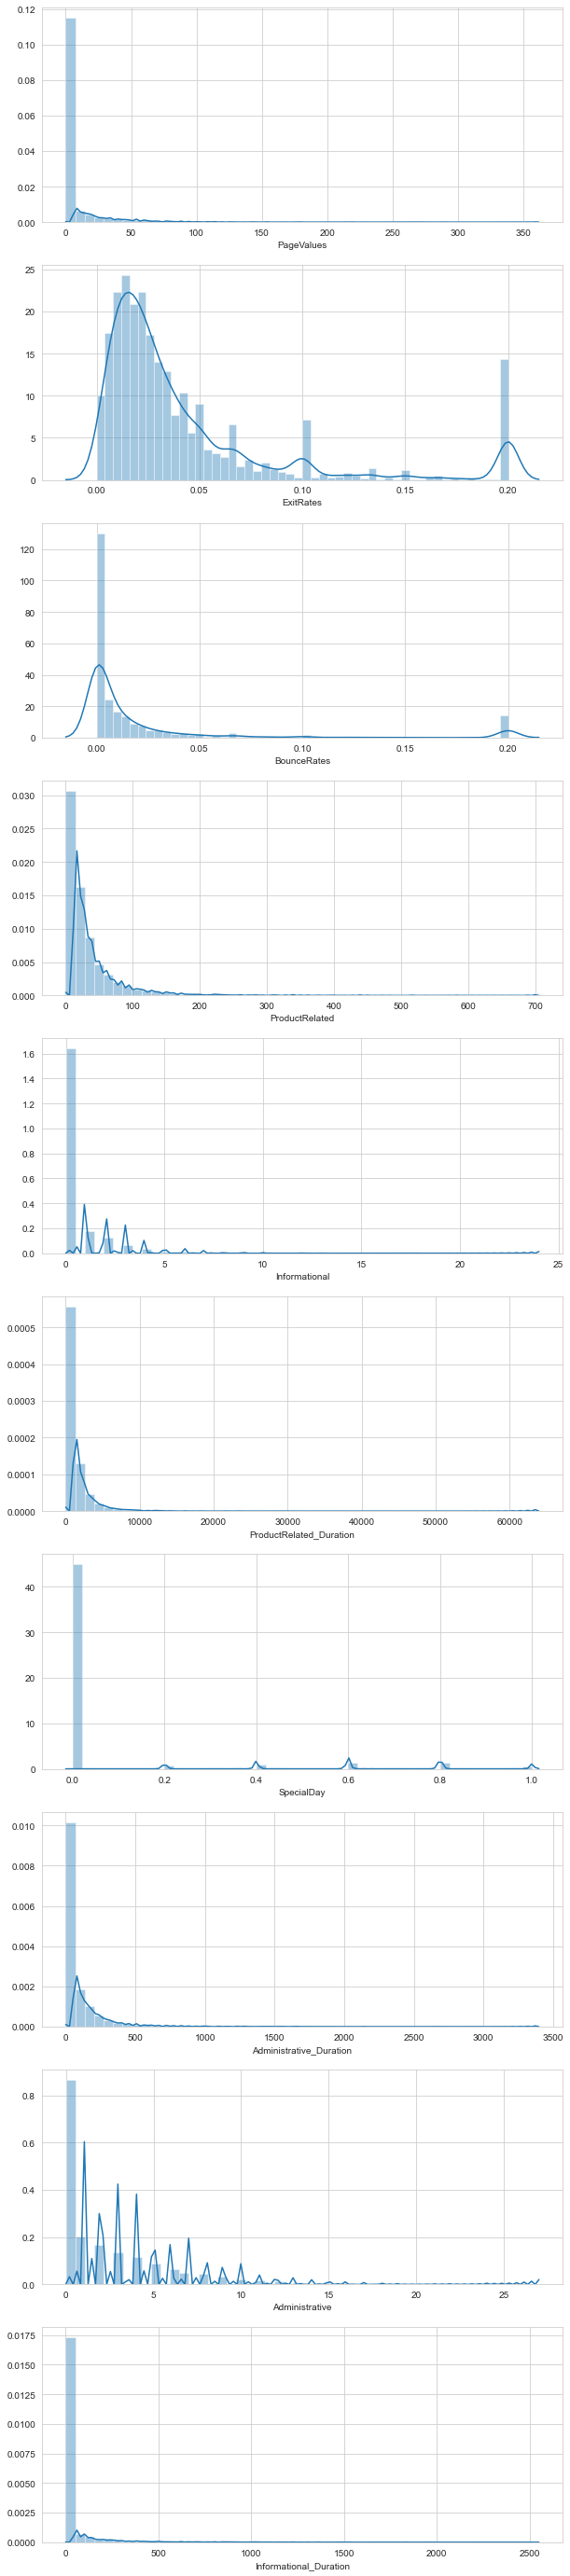

In [148]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(df[col],ax=ax[idx],kde_kws={'bw':0.005})

In [149]:
df[numeric_cols].min()

PageValues                 0.0
ExitRates                  0.0
BounceRates                0.0
ProductRelated             0.0
Informational              0.0
ProductRelated_Duration    0.0
SpecialDay                 0.0
Administrative_Duration    0.0
Administrative             0.0
Informational_Duration     0.0
dtype: float64

## Box plot for outlier detection

Since the distribution plots are skewed the enhanced boxplot are are used to vizualize conditional distribution.
the enhanced box plot can br use to vizualize more quantiles

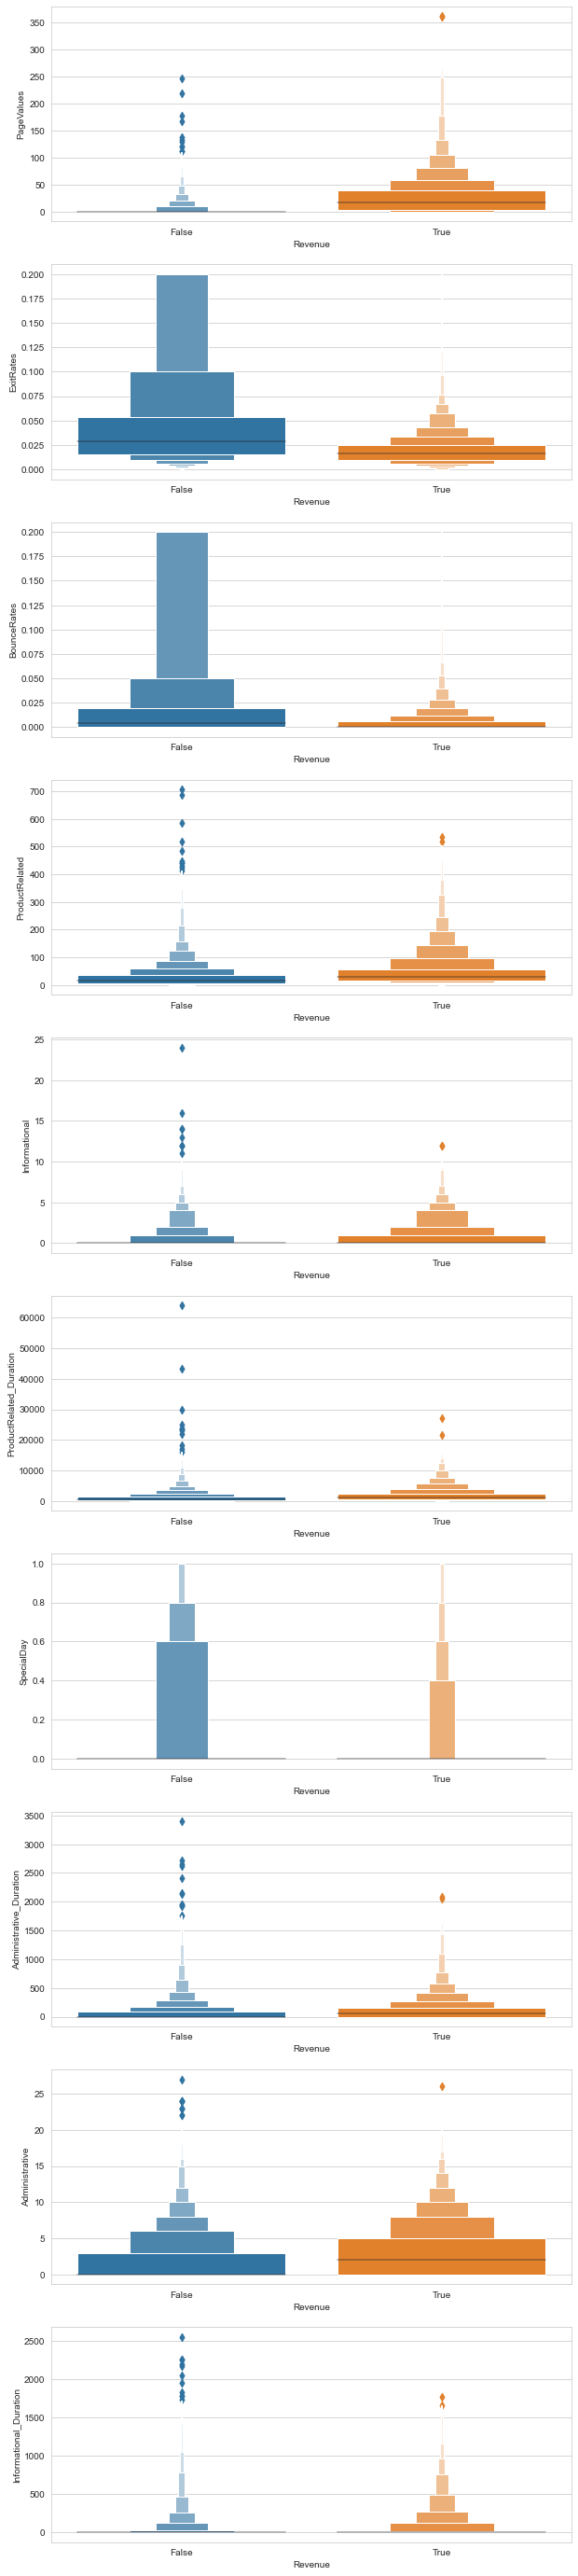

In [150]:
df[cat_cols] =df[cat_cols].astype('category') 
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.boxenplot(y=col,x='Revenue',data=df[numeric_cols + ['Revenue']],ax=ax[idx])

Now the outliers for columns are clipped

In [151]:
df['Administrative']=df['Administrative'].clip(upper=20)
df['PageValues']=df['PageValues'].clip(upper=250)
df['Administrative_Duration']=df['Administrative_Duration'].clip(upper=1500)
df['Informational']=df['Informational'].clip(upper=10)
df['ProductRelated_Duration']=df['ProductRelated_Duration'].clip(upper=20000)
df['ProductRelated']=df['ProductRelated'].clip(upper=600)
df['Informational_Duration']=df['Informational_Duration'].clip(upper=1500)

To fix the skew various transforms can be applied. To see if the transformation is useful multivariate analysis for the transfomration can be compared with that of the original dataset. 

In [152]:
from sklearn.preprocessing import PowerTransformer

In [153]:
pt = PowerTransformer(standardize=True)
transformed_df = pd.DataFrame(pt.fit_transform(df[numeric_cols]),columns=numeric_cols)
transformed_df[cat_cols]=df[cat_cols]
transformed_df=transformed_df.dropna()
transformed_0 = transformed_df[transformed_df['Revenue']==0]
transformed_1 = transformed_df[transformed_df['Revenue']==1]
transformed_df.isna().sum()

PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated             0
Informational              0
ProductRelated_Duration    0
SpecialDay                 0
Administrative_Duration    0
Administrative             0
Informational_Duration     0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Month                      0
dtype: int64

In [173]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12302 entries, 0 to 12315
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   PageValues               12302 non-null  float64 
 1   ExitRates                12302 non-null  float64 
 2   BounceRates              12302 non-null  float64 
 3   ProductRelated           12302 non-null  float64 
 4   Informational            12302 non-null  float64 
 5   ProductRelated_Duration  12302 non-null  float64 
 6   SpecialDay               12302 non-null  float64 
 7   Administrative_Duration  12302 non-null  float64 
 8   Administrative           12302 non-null  float64 
 9   Informational_Duration   12302 non-null  float64 
 10  OperatingSystems         12302 non-null  category
 11  Browser                  12302 non-null  category
 12  Region                   12302 non-null  category
 13  TrafficType              12302 non-null  category
 14  Visito

Below we can see the change in distibution when yeo-jhonson transformations was applied

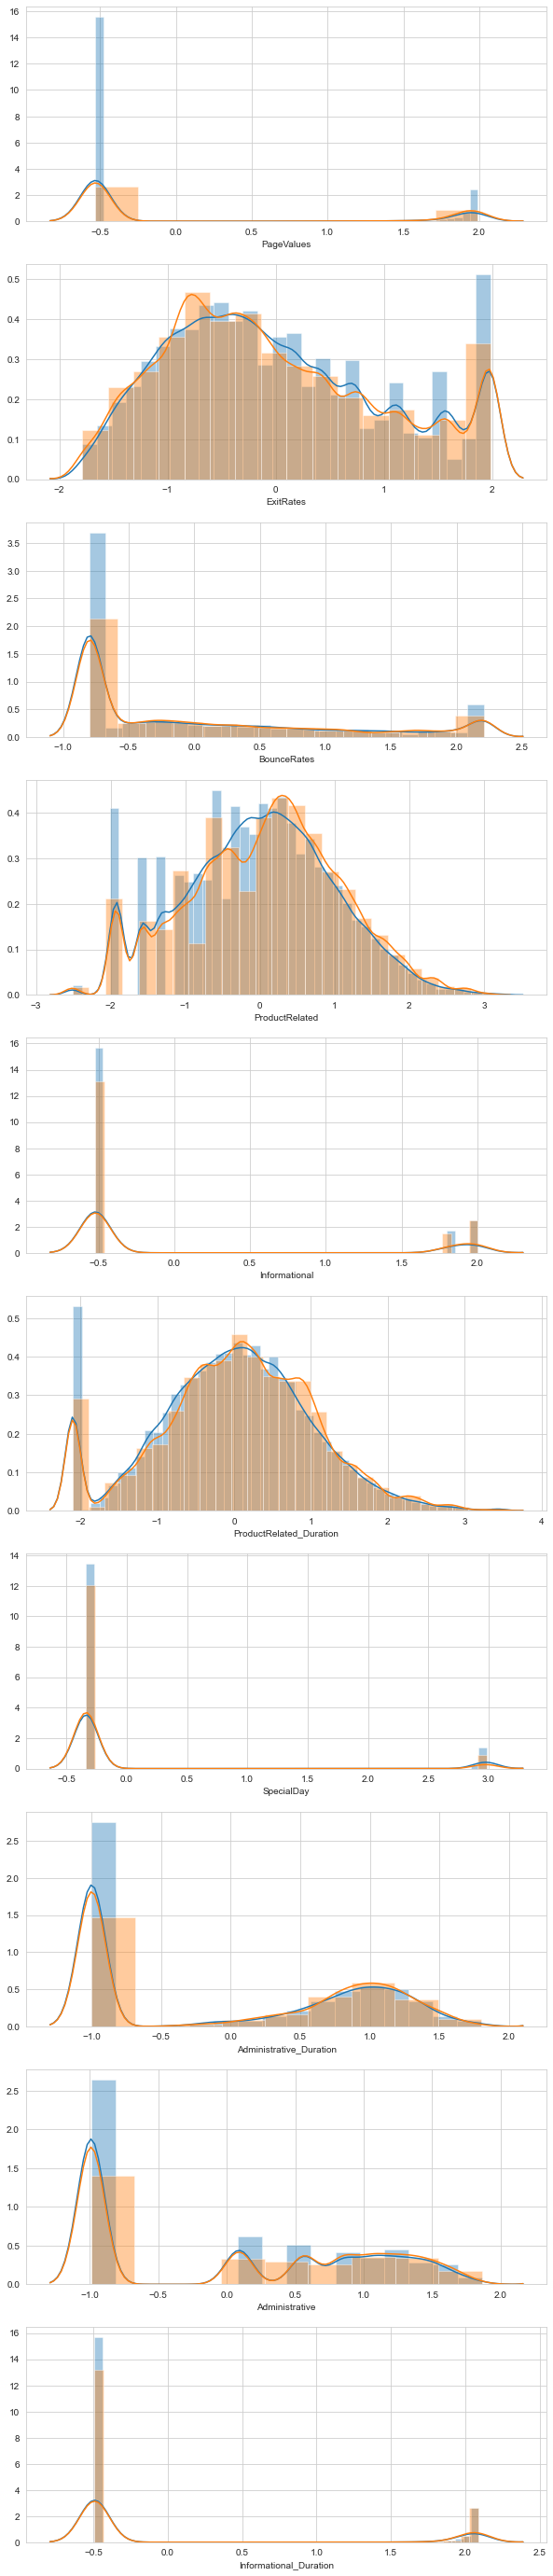

In [154]:
f,ax =plt.subplots(len(numeric_cols),1,figsize=(10,50))
for idx,col in enumerate(numeric_cols):
    sns.distplot(transformed_0[col],ax=ax[idx],kde_kws={'bw':0.1})
    sns.distplot(transformed_1[col],ax=ax[idx],kde_kws={'bw':0.1})

## Multivariate Analysis

Scatter plots and pearsons correltations coefficient are used to find if numeric features are realted. 

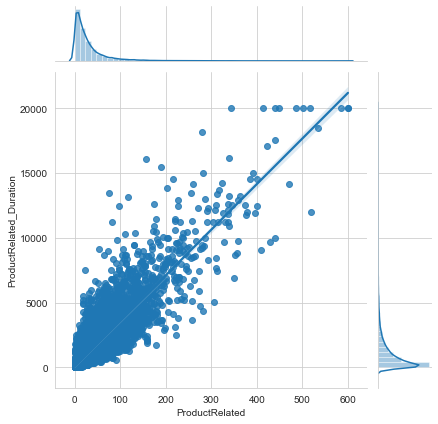

In [155]:
sns.jointplot(x="ProductRelated" ,y="ProductRelated_Duration",data=df[numeric_cols],kind="reg")

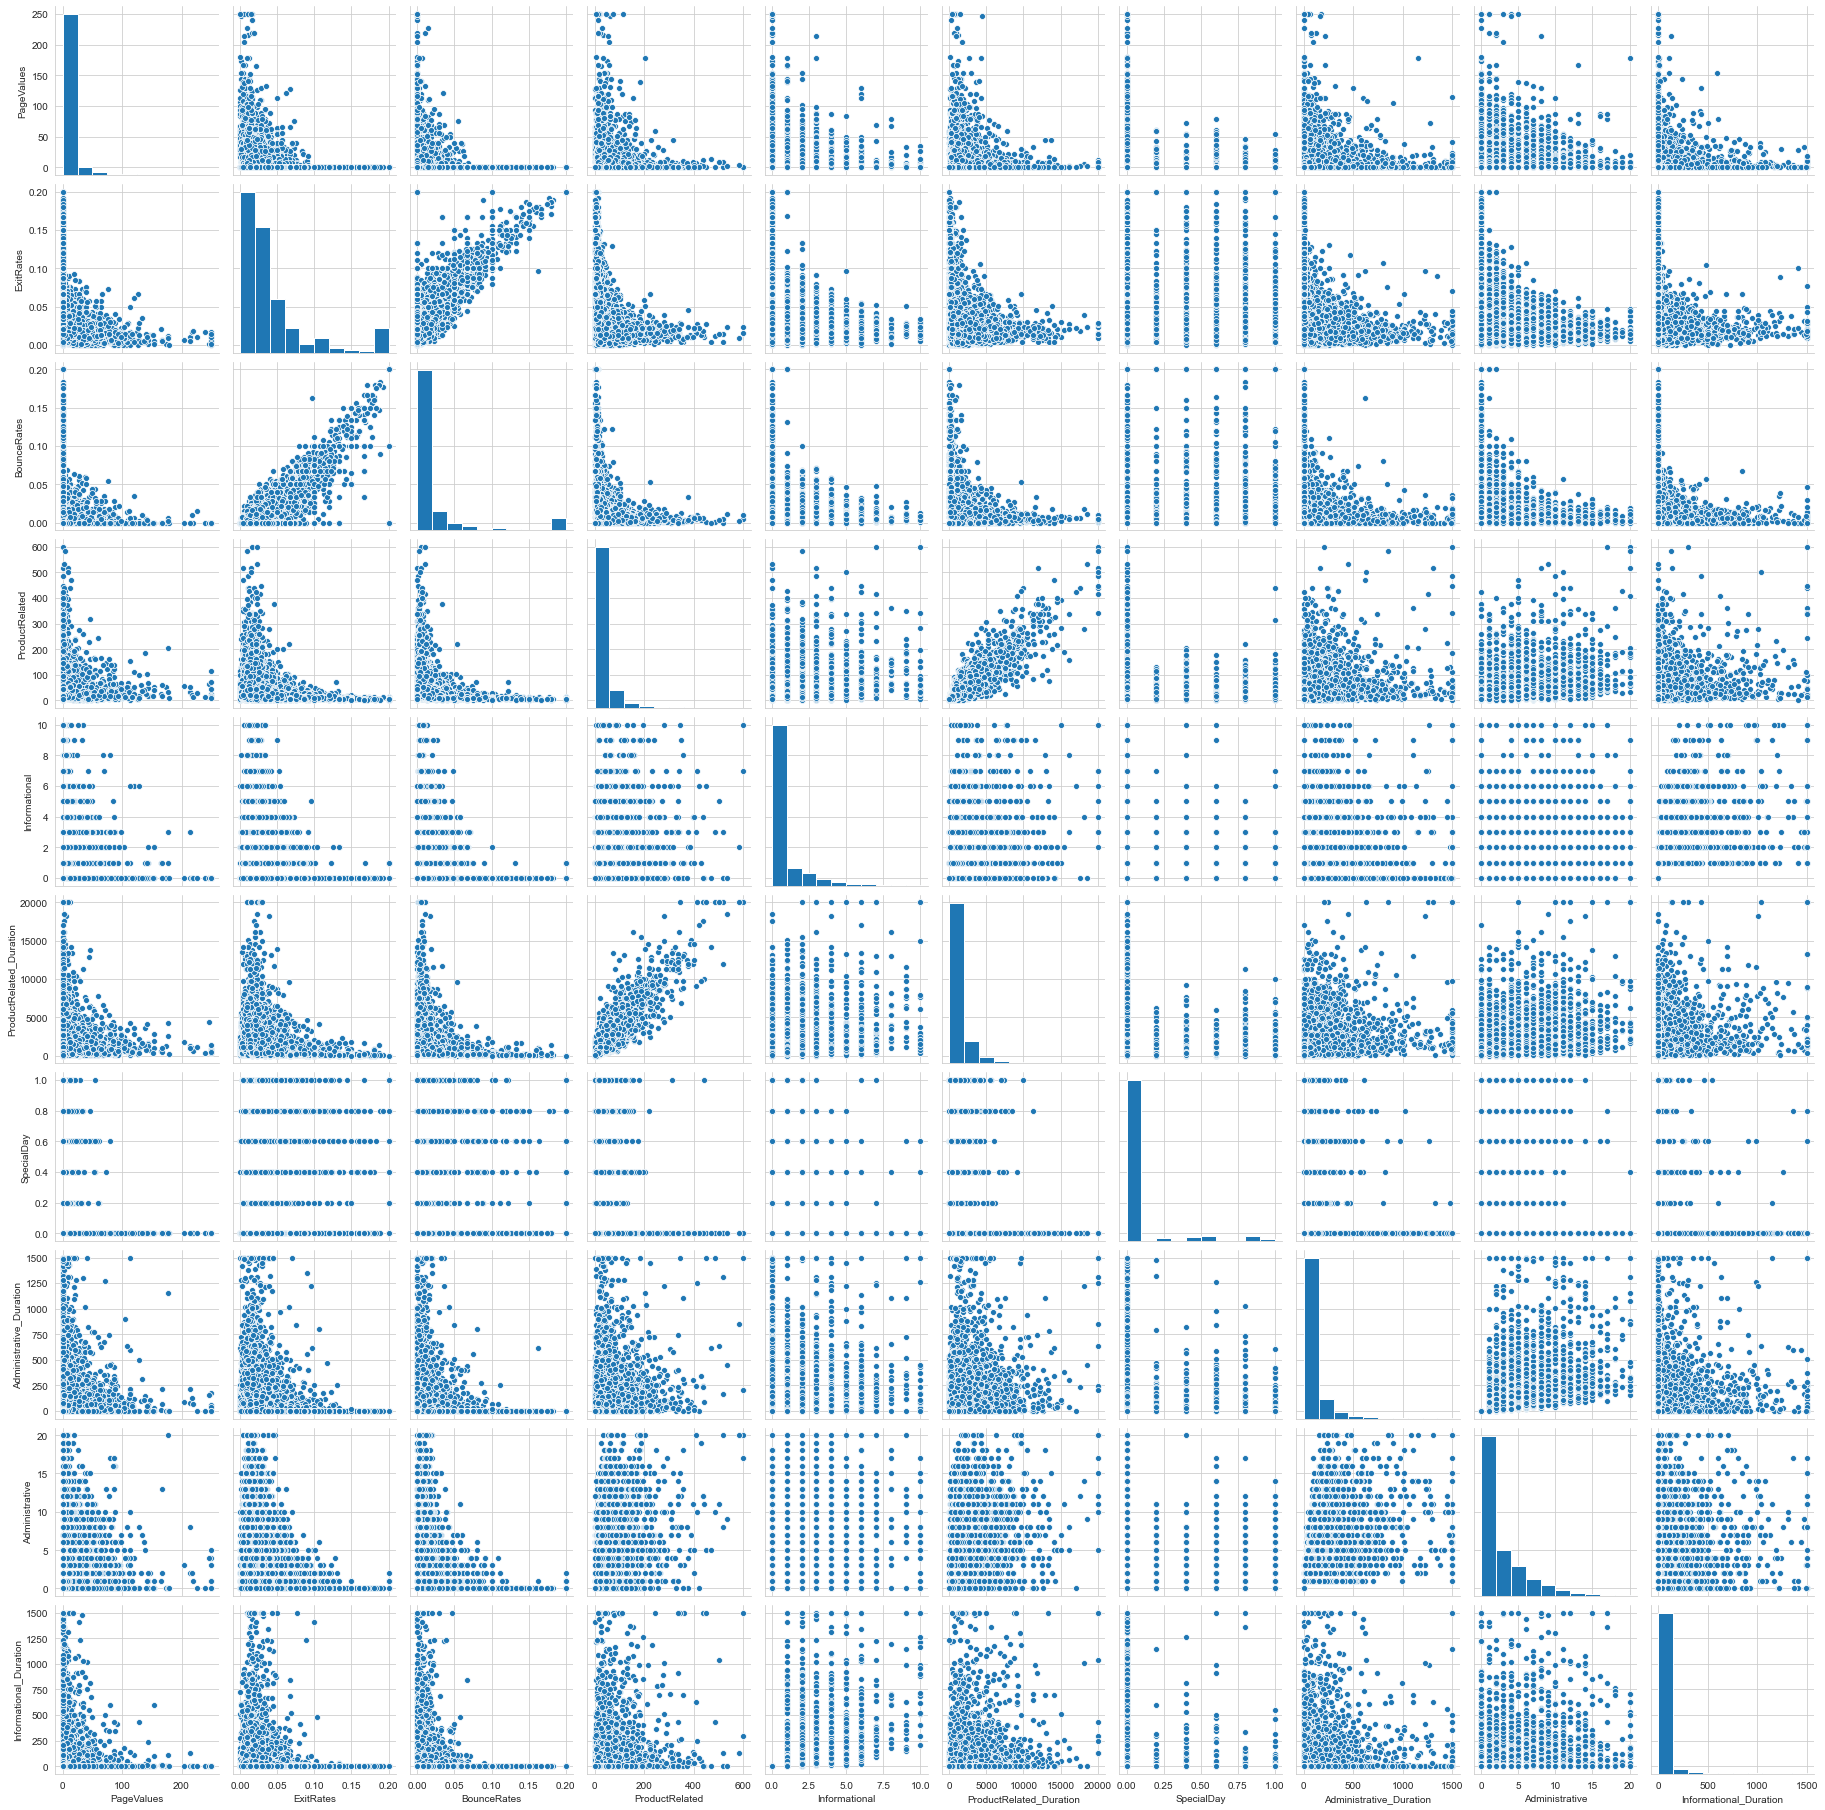

In [174]:
#pairplot for untransfromed dataset
sns.pairplot(df,vars=numeric_cols)#scatter plot between pairs of numeric columns

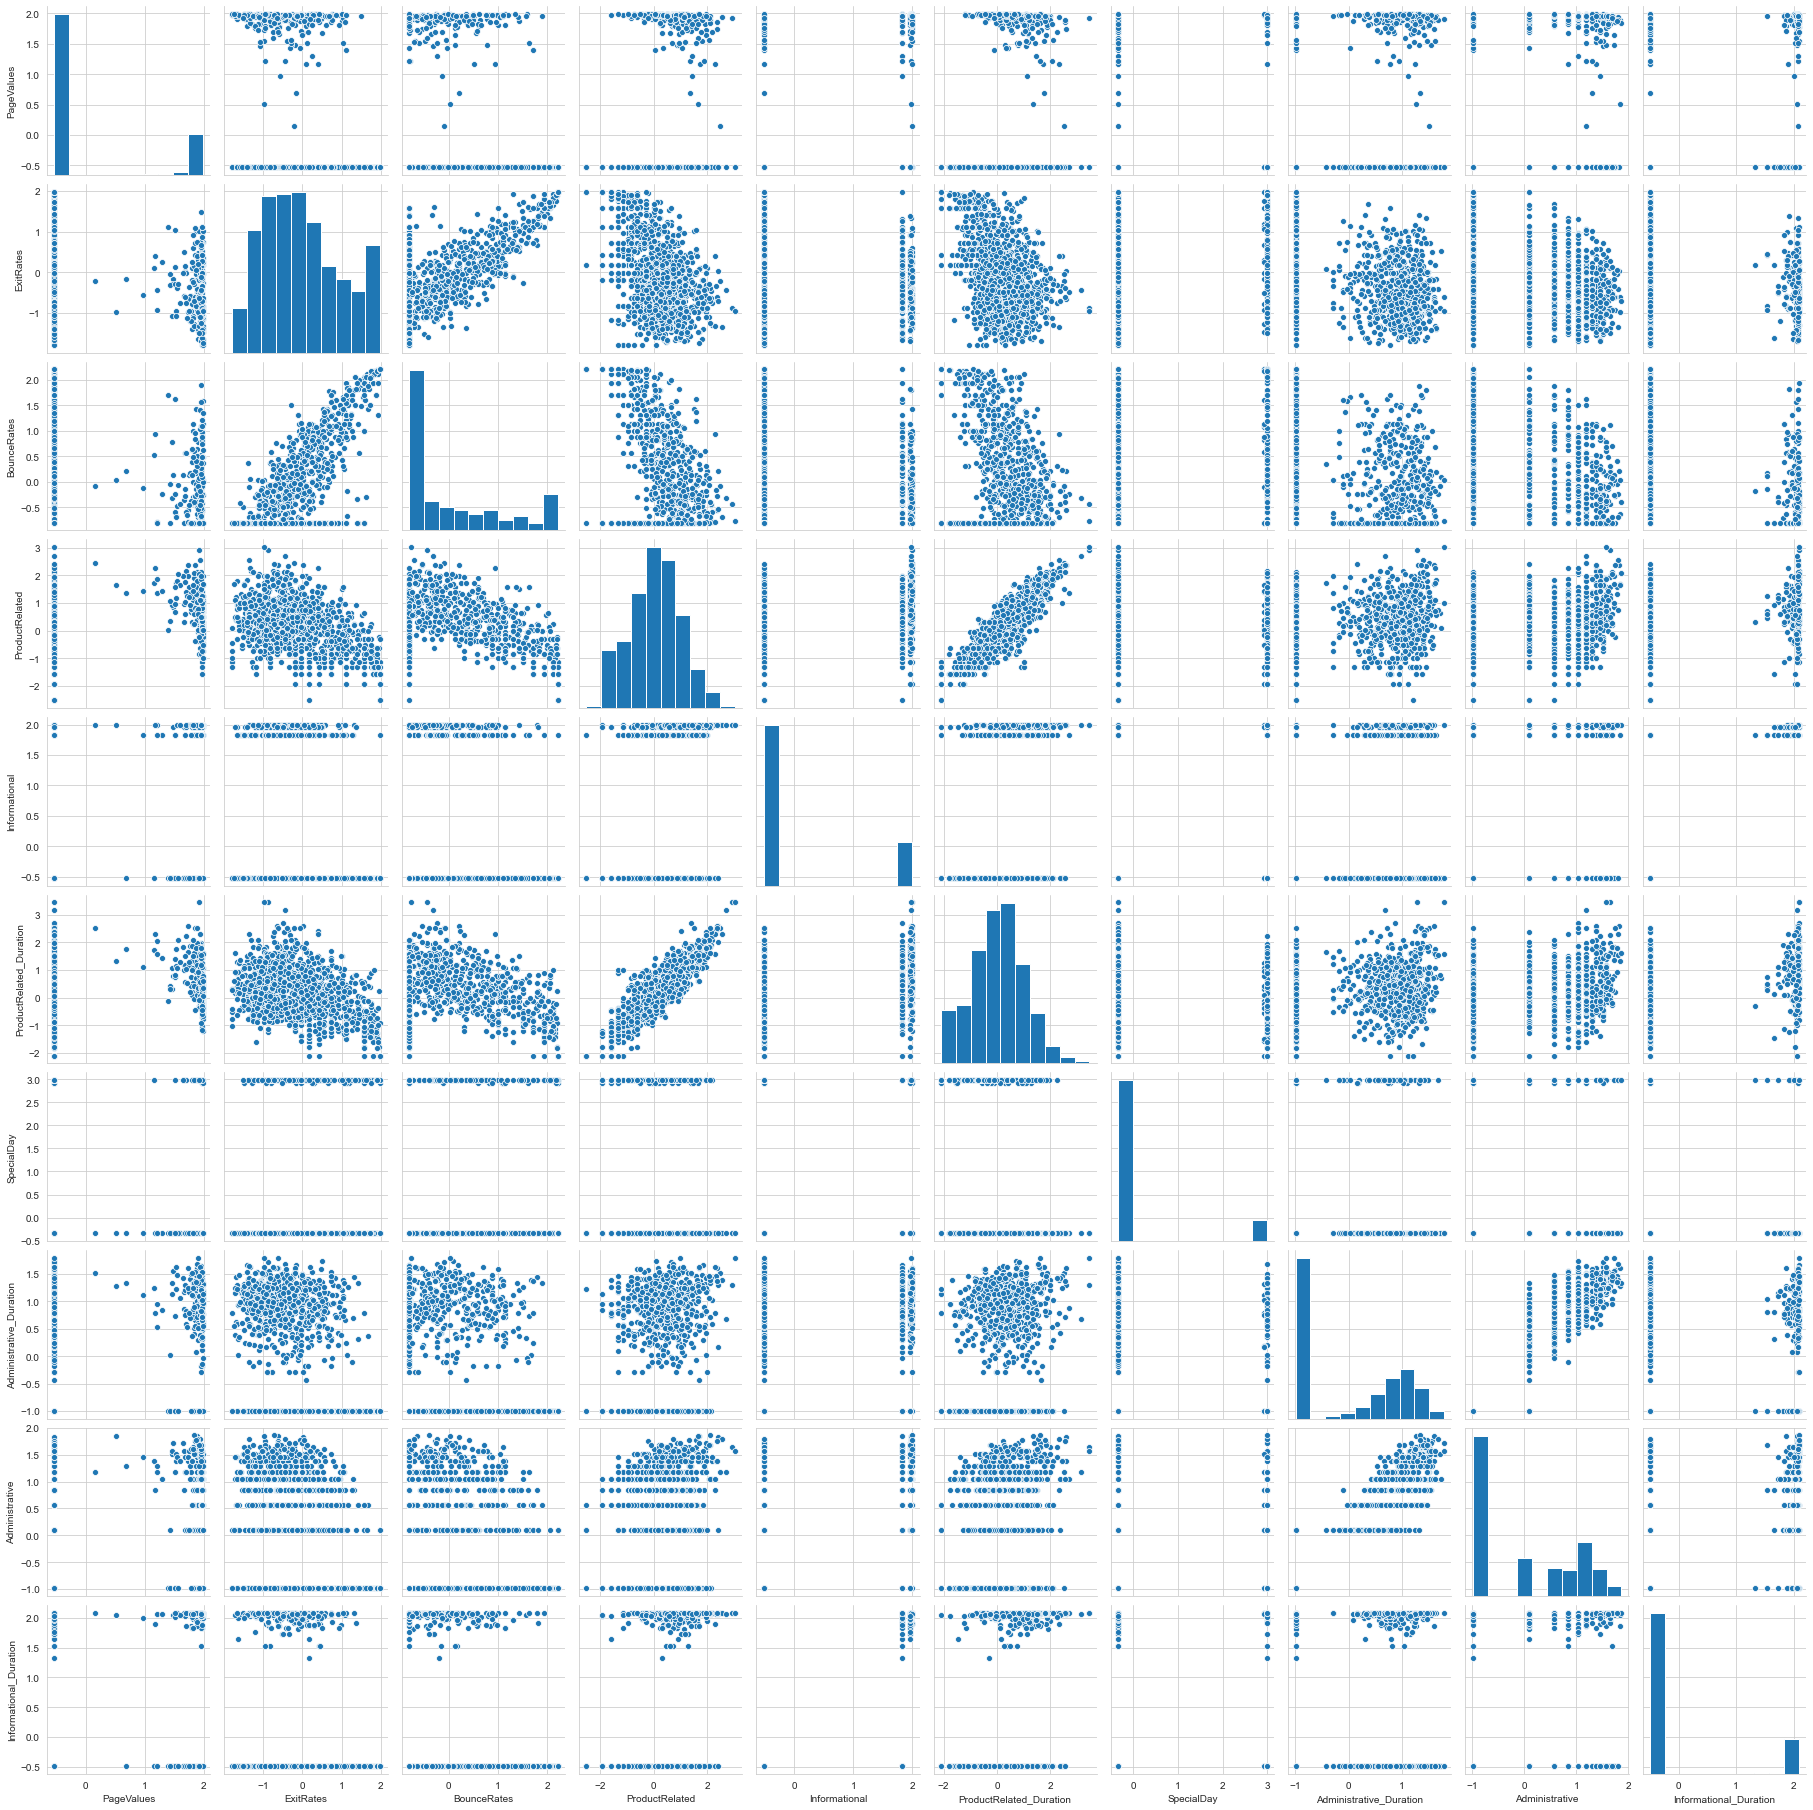

In [163]:
#pairplot for transfromed dataset
sns.pairplot(transformed_df.sample(frac=0.1),vars=numeric_cols)

<AxesSubplot:>

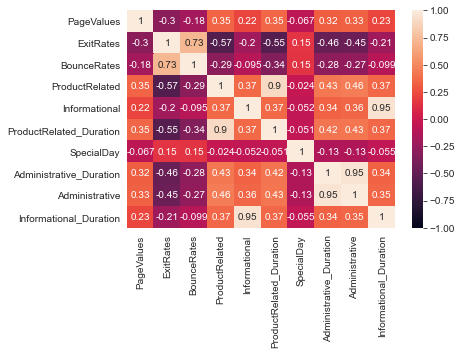

In [175]:
#heat map for untransformed dataset
sns.heatmap(transformed_df[numeric_cols].corr(),annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

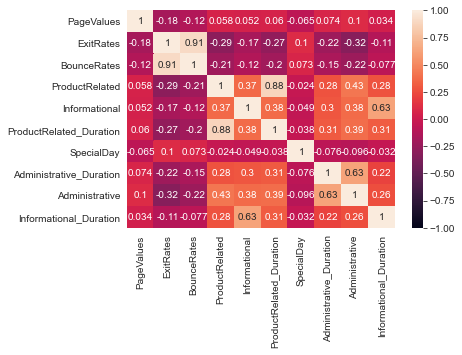

In [176]:
#Heat map for transformed dataset
sns.heatmap(df[numeric_cols].corr(),annot=True,vmin=-1,vmax=1)

For relation between categorical and numerical features analysis of variance test is used which rejects the null hypothesis. 

In [177]:
from scipy.stats import f_oneway
for col in numeric_cols:
    print(col,f_oneway(df[col],df['Revenue']))


PageValues F_onewayResult(statistic=1216.5860735007025, pvalue=3.224422043821183e-260)
ExitRates F_onewayResult(statistic=1157.4051646289086, pvalue=6.010190087008823e-248)
BounceRates F_onewayResult(statistic=1628.938326563153, pvalue=0.0)
ProductRelated F_onewayResult(statistic=6270.749778903707, pvalue=0.0)
Informational F_onewayResult(statistic=888.028198982605, pvalue=9.93026727052001e-192)
ProductRelated_Duration F_onewayResult(statistic=5543.960716979227, pvalue=0.0)
SpecialDay F_onewayResult(statistic=630.3098595619027, pvalue=2.2852092732324047e-137)
Administrative_Duration F_onewayResult(statistic=2843.475576461068, pvalue=0.0)
Administrative F_onewayResult(statistic=5210.31019513269, pvalue=0.0)
Informational_Duration F_onewayResult(statistic=789.6001875807722, pvalue=4.90949434563493e-171)


## Dataset Summary

The dataset contains 8 categorical and 10 numeric features and one Target class.
All of these 8 categorical features are nominal and 2 of them are strings which need to be encoded.

Target class is imbalanced. Techniques like oversampling, undersampling or smoting can be used along with Stratified Cross Validation for developing a robust model

The numeric values had a few outliers. The distribution of numeric values are highly skewed. The feature Exit rate is bimodal.
there is a high correlation between productrelated and productrelated_duration (0.88) and Exit rate and bounce rate(0.91).
An analysis of variance test suggests that numeric columns are correlated with the target variable.

pairwise Scatter plot suggest non-linear relation ship.